In [2]:
import os
import data_loader as dl
import correlation_plot as cp
import profile_plot as dp
import express_statistic_plot as es
import trf_type_barplot as tt
import read_statistic as rs
import pathlib
import pylab

%matplotlib inline

'''
# Visualization module of tRNAExploer (v1.0) 
# The visual configure file
'''
#visual_config = "/Users/hqyone/PycharmProjects/data_output/server2/visual_config.tsv"
visual_config = "/Users/hqyone/PycharmProjects/data_output/tRNA_seq/output/visual_config.tsv"
#visual_config = "/Users/hqyone/PycharmProjects/data_output/cancer/output/visual_config.tsv"
if not os.path.isfile(visual_config):
    print("Can't find config file. Abort !")
    exit(-1)

# If you don't set report_dir, the default path will be <output_dir>+"/reports"
report_dir = ""

# Loading data
d =  dl.LoadConfig(visual_config, report_dir)

/Users/hqyone/PycharmProjects/data_output/tRNA_seq/output/static.log



SRR1836123_tRNA_control1
read_5_fragment
T     760485.167
C     215543.043
TC     73200.991
TT     70926.024
A      38268.009
TG     34101.014
CA     27579.997
G      25933.061
AT     24934.981
CT     23487.971
Name: mean_number, dtype: float64
read_3_fragment
GGAGGTCCTGTGTTCGATCCACAGAATTCGCACCA    6321.000
CA                                     5052.004
CCA                                    2439.000
GACGACCCACCA                           1270.997
CCCTTCGTGGTCGCCA                       1175.000
A                                       793.010
CTCACACGGGGCACCA                        511.998
TGACGCCA                                428.000
GGAGGTCCTGTGTTCGATCCACAGAATCCGCACCA     410.000
CCTTCGTGGTCGCCA                         364.000
Name: mean_number, dtype: float64

SRR1836124_tRNA_control2
read_5_fragment
T     819814.992
C     219296.040
TC     92533.045
TT     84624.999
A      49901.036
TG     34044.033
AT     28905.977
G      26524.010
CA     25186.986
CT     22469.046
Name: mean_n

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (36) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


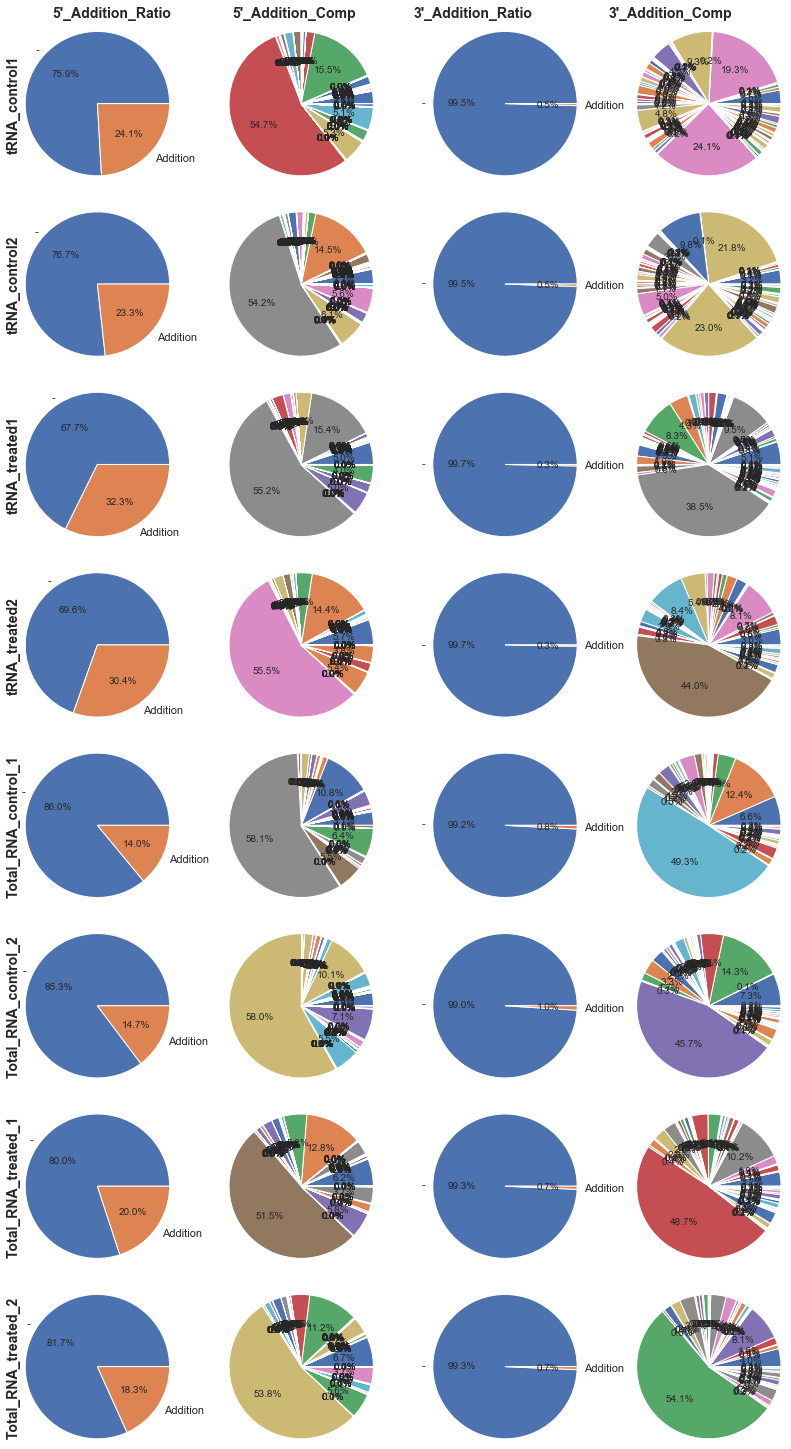

In [4]:
'''
    The function shows the 5' and 3' base addition modifications of tRFs.
    The function will print the top 5' and 3' addition modifications
    And draw four types/columns of pie charts:
        1. Pie charts showing the ratio of tRFs with or without 5'-Addition modification
        2. Pie charts showing the composition of 5'-Addition modifications
        3. Pie charts showing the ratio of tRFs with or without 3'-Addition modification
        4. Pie charts showing the composition of 3'-Addition modifications
    @param d: The data object generated by data_loader.py
    @param proj_name: the name of project, the default is "test", use can check the name of hit.tab file
            it follows the pattern : <sampleID>+"_"+<proj_name>+"_hit.tab"
    @param top_num: The number of top addition modifications to be printed out
    @param radius: the radius of pies
    @param fontsize:
    @param fig_width:
    @return: None
'''
rs.getAddModificationStatisitc(d, 'test')

# import pandas as pd
# import matplotlib.pyplot as plt
# 
# proj_name ="test"
# sample_dic = d["sample_dic"]
# s_num =len(sample_dic.keys())
# 
# sample_ls = list(sample_dic.keys())
# sample_ls.sort()
# 
# 
# fig, axs = plt.subplots(s_num, 4, figsize=[14, s_num*3+2])
# radius = 1.2
# fontsize =14
# index = 0
# for s in sample_ls:
#     des = sample_dic[s]
#     hit_tab = d['wdir']+"/"+s+"_"+proj_name+"_hit.tab"
#     df = pd.read_csv(hit_tab, sep="\t")
# 
#     df = dl.add_aa_column(df, trna_id="tRNA_id")
# 
#     df['temp5'] = df['read_5_fragment']
#     group_a = df.groupby('read_5_fragment').sum()
#     axs[index,1].pie(group_a["mean_number"],labels=group_a.index,autopct='%1.1f%%',shadow=False, radius=radius,labeldistance=None)
#     print("\n"+s+"_"+des)
#     sorted_df =group_a.sort_values(["mean_number"], ascending=[False]).head(10)
#     with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also  
#         print(sorted_df['mean_number'])
#     group_c = df.groupby('read_3_fragment').sum()
#     sorted_df =group_c.sort_values(["mean_number"], ascending=[False]).head(10)
#     with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also  
#         print(sorted_df['mean_number'])
#     axs[index,3].pie(group_c["mean_number"],labels=group_c.index,autopct='%1.1f%%',shadow=False, radius=radius, labeldistance=None)
#     #axs[index,1].text(-0.06, 0.5, des, transform=axs[index,0].transAxes,va='center', fontsize=12, weight='bold', rotation=90)
# 
#     df.loc[df['temp5'].isna(),'read_5_fragment']='-'
#     df.loc[df['temp5'].notna(),'read_5_fragment']='Addition'
#     group_b = df.groupby('read_5_fragment').sum()
#     axs[index,0].pie(group_b["mean_number"],labels=group_b.index,autopct='%1.1f%%',shadow=False, radius=radius)
#     axs[index,0].text(-0.1, 0.5, des, transform=axs[index,0].transAxes,va='center', fontsize=fontsize, weight='bold', rotation=90)
# 
#     df['temp3'] = df['read_3_fragment']                                                     
#     df.loc[df['temp3'].isna(),'read_3_fragment']='-'
#     df.loc[df['temp3'].notna(),'read_3_fragment']='Addition'
#     group = df.groupby('read_3_fragment').sum()
#     axs[index,2].pie(group["mean_number"],labels=group.index,autopct='%1.1f%%',shadow=False, radius=radius)
#     if index==0:
#         axs[index,0].text(0.2, 1.1, "5'_Addition_Ratio", transform=axs[index,0].transAxes,va='center', fontsize=fontsize, weight='bold', rotation=0)
#         axs[index,1].text(1.4, 1.1, "5'_Addition_Dist", transform=axs[index,0].transAxes,va='center', fontsize=fontsize, weight='bold', rotation=0)
#         axs[index,2].text(2.6, 1.1, "3'_Addition_Ratio", transform=axs[index,0].transAxes,va='center', fontsize=fontsize, weight='bold', rotation=0)
#         axs[index,3].text(3.9, 1.1, "3'_Addition_Dist", transform=axs[index,0].transAxes,va='center', fontsize=fontsize, weight='bold', rotation=0)
#     index+=1
# 